# 9.1 matplotlib API 入门

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


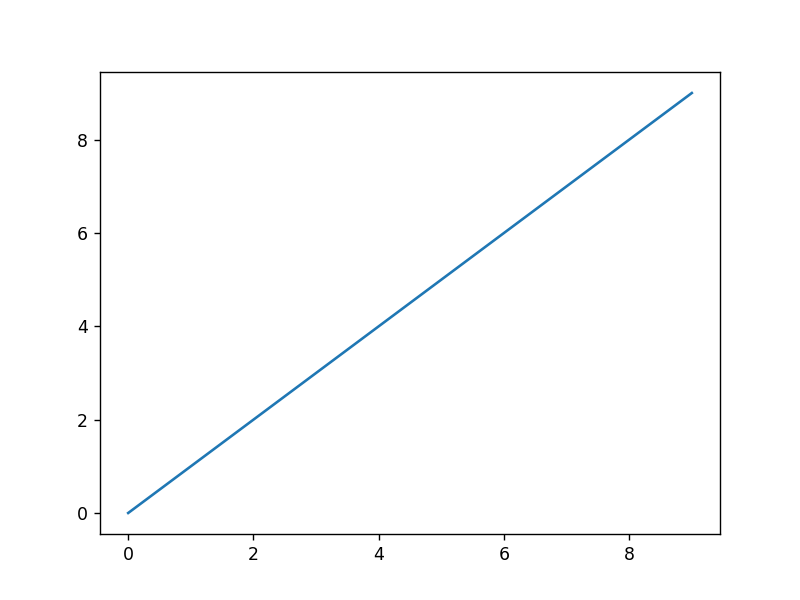

In [5]:
plt.plot(data)

## 9.1.1 Figure和Subplot

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


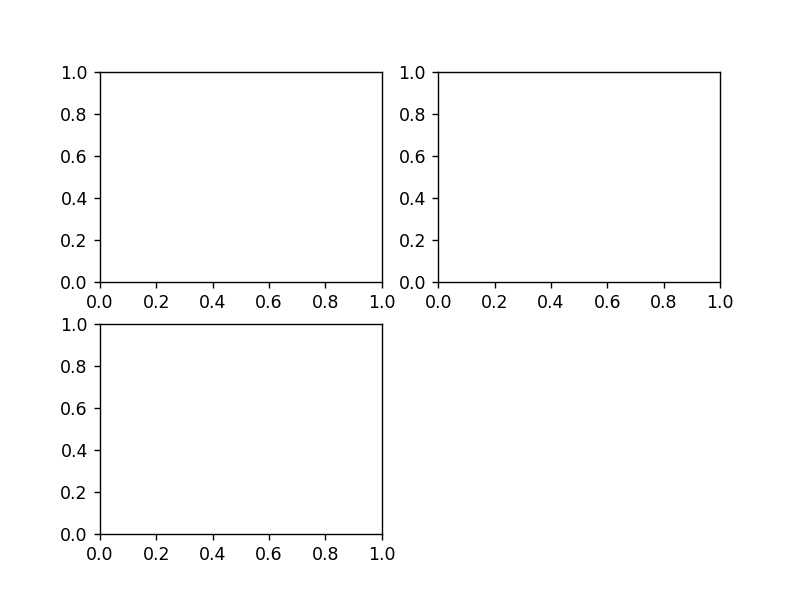

In [7]:
# matplotlib的图像都位于Figure对象中
# 可以用plt.figure()创建一个新的Figure

fig = plt.figure()

In [8]:
# 不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行
# 用add_subplot()创建一个或多个subplot(子图)

ax1 = fig.add_subplot(2, 2, 1)  

# 图像应该是2X2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

<IPython.core.display.Javascript object>


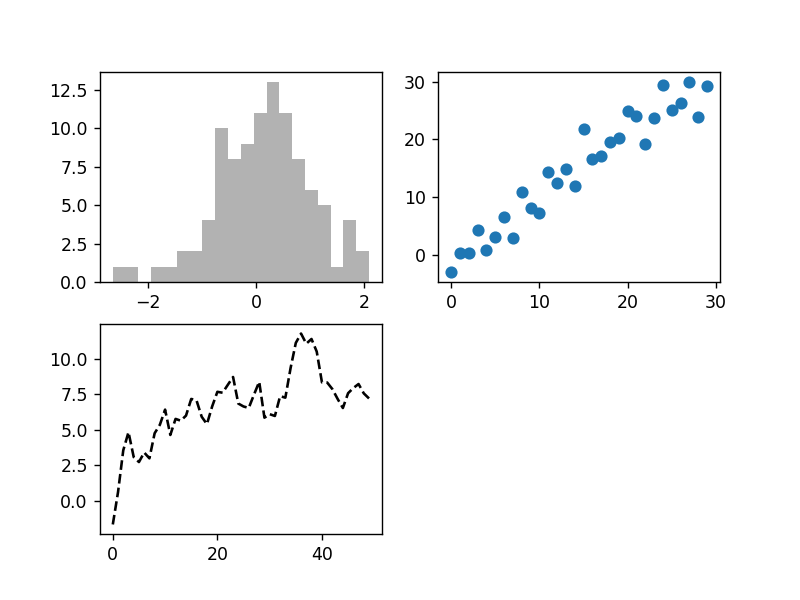

In [11]:
# # jupyter notebook中，每个小窗重新执行后，图形会被重置。
# # 因此，对于复杂的图形，必须将所有的绘图命令存在一个小窗里。

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

In [12]:
# 如果这里执行一条绘图命令（如plt.plot([1.5, 3.5, -2, 1.6]),matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制，
# 隐藏创建figure和subplot的过程。

plt.plot(np.random.randn(50).cumsum(), 'k--')

# 'k--': 线型选项，绘制黑色虚线图

In [13]:
# 上面那些由fig.add_subplot()所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图。

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  1.,  0.,  1.,  1.,  2.,  2.,  4., 10.,  8.,  9., 11., 13.,
        11.,  8.,  6.,  5.,  1.,  4.,  2.]),
 array([-2.65139297, -2.41464712, -2.17790127, -1.94115542, -1.70440957,
        -1.46766372, -1.23091787, -0.99417202, -0.75742617, -0.52068033,
        -0.28393448, -0.04718863,  0.18955722,  0.42630307,  0.66304892,
         0.89979477,  1.13654062,  1.37328647,  1.61003232,  1.84677817,
         2.08352402]),
 <a list of 20 Patch objects>)

In [14]:
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<IPython.core.display.Javascript object>


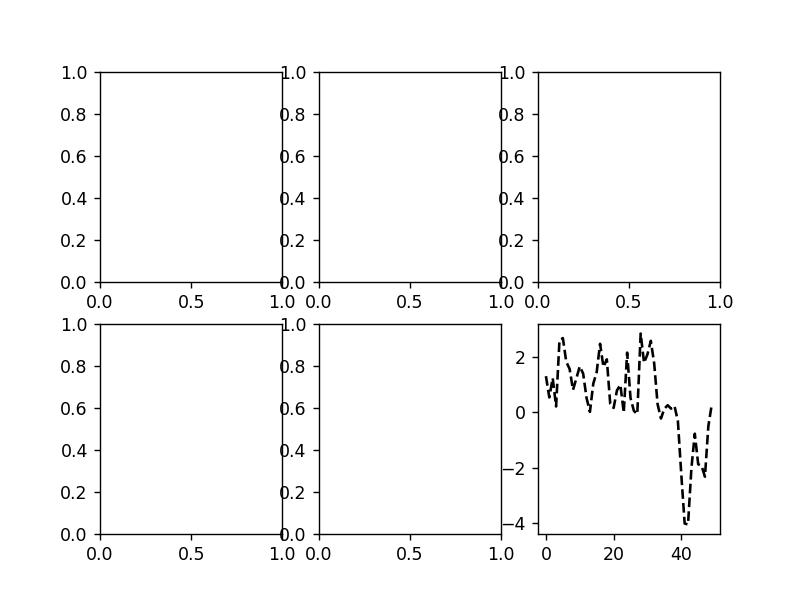

In [15]:
# plt.subplots: 可以创建一个新的Figure,并返回一个含有已创建的subplot对象的NumPy数组

fig, axes = plt.subplots(2, 3)

In [17]:
axes[1, 2].plot(np.random.randn(50).cumsum(), 'k--')   # axes[1, 2]: 指定网格位置

In [18]:
%%html
<img src="picture/表9-1 pyplot.subplots的选项.png">

## 9.1.2 调整subplot周围的间距

In [19]:
# subplots_adjust(): 修改间距，是一个顶级函数

# subplots_adjust(left=None, bottom=None, right=None, top=None,
#                wspace=None, hspace=None)

# wspace, hspace: 控制宽度和高度的百分比

<IPython.core.display.Javascript object>


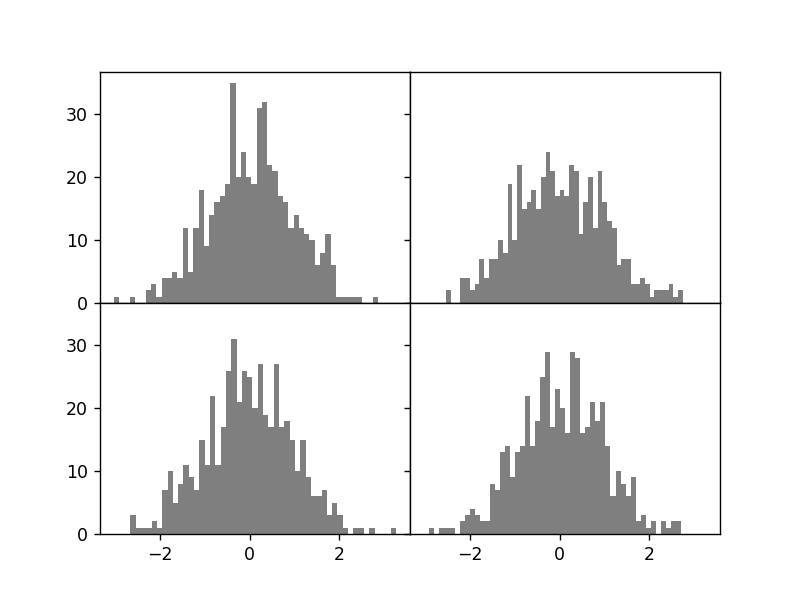

In [24]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


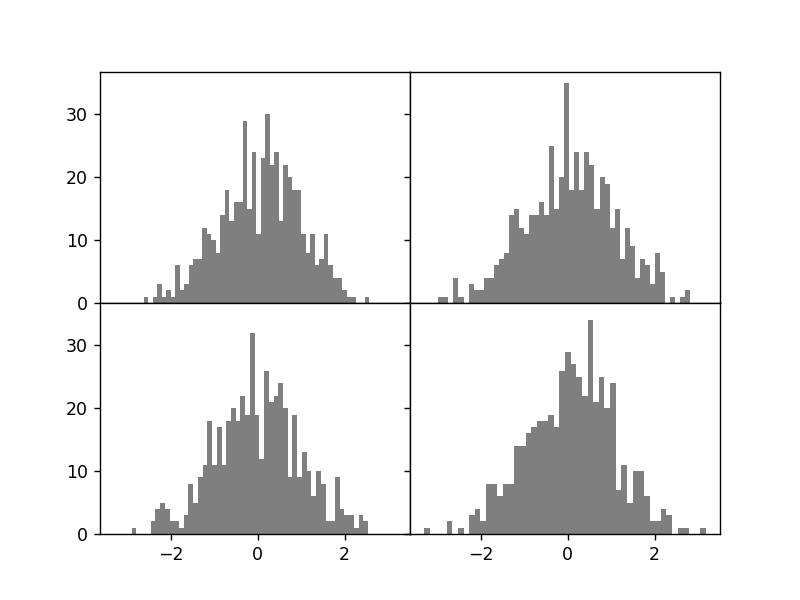

In [25]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [26]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [27]:
plt.subplots_adjust(wspace=0, hspace=0)

In [29]:
# 自省 

plt.plot?

## 9.1.3 颜色、标记和线型

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [31]:
# x.plot(x, y, 'g--')  == ax.plot(x, y, linesyple='--', color='g')

<IPython.core.display.Javascript object>


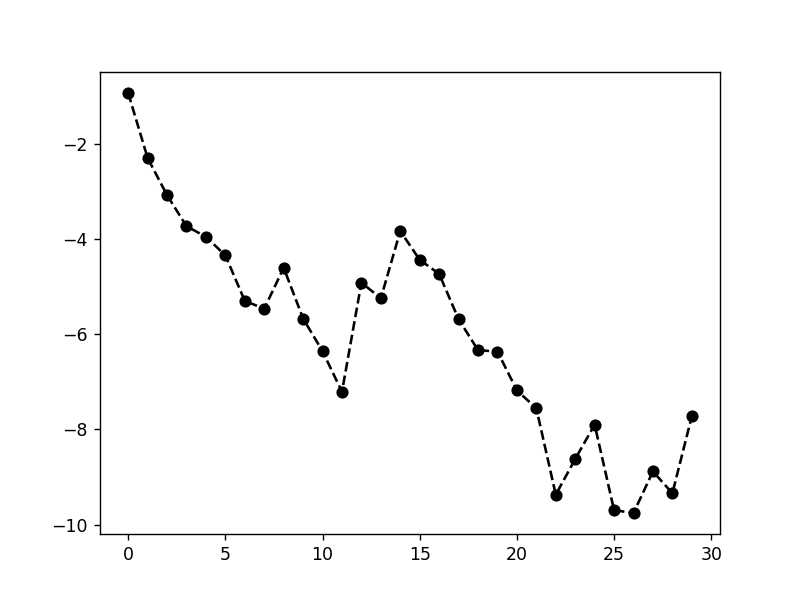

In [32]:
# 标记

from numpy.random import randn

fig = plt.figure()
plt.plot(randn(30).cumsum(), 'ko--')

In [43]:
# 可将其写成更明确的形式

plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [33]:
# 在线型图中，非实际数据点默认是按线性方式插值的。
# 可通过drawstyle选项修改

data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


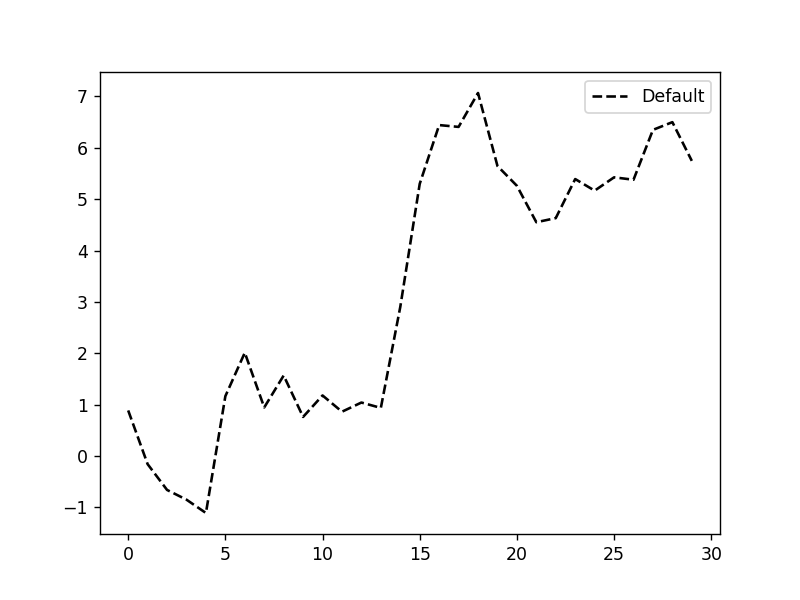

In [34]:
fig = plt.figure()
plt.plot(data, 'k--', label='Default')

In [51]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [35]:
plt.legend(loc='best')

## 9.1.4 刻度、标签和图例

## 9.1.5 设置标量、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


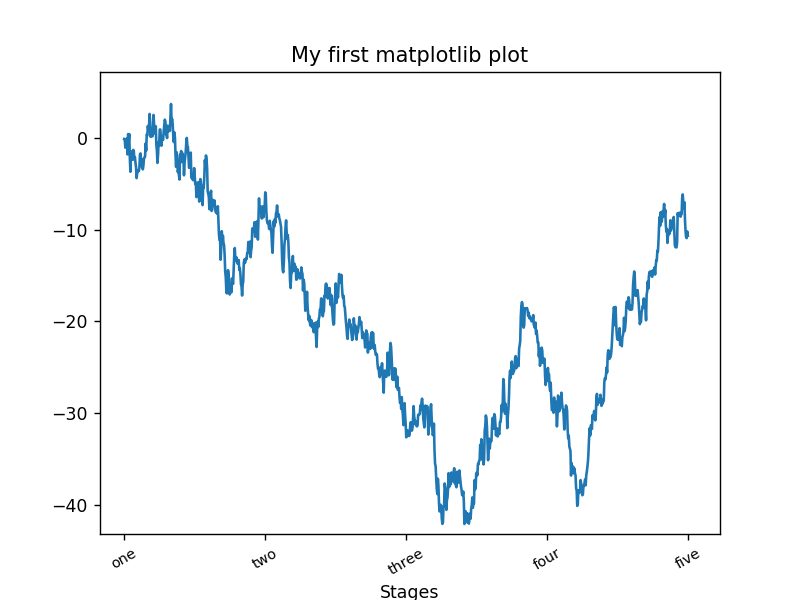

In [36]:
fig = plt.figure()

In [38]:
ax = fig.add_subplot(1, 1, 1)

In [39]:
ax.plot(np.random.randn(1000).cumsum())

In [40]:
# 改变x轴刻度：set_xticks(), set_xticklabels()
# set_xticks(): 指定将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。
# 也可以通过set_xticklabels将任何其他的值用作标签

ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [41]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='small')

In [42]:
# set_title(): 设置标题

ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [43]:
# set_xlabel(): 为X轴设置一个名称

ax.set_xlabel('Stages')

Text(0.5, 15.528422124795624, 'Stages')

<IPython.core.display.Javascript object>


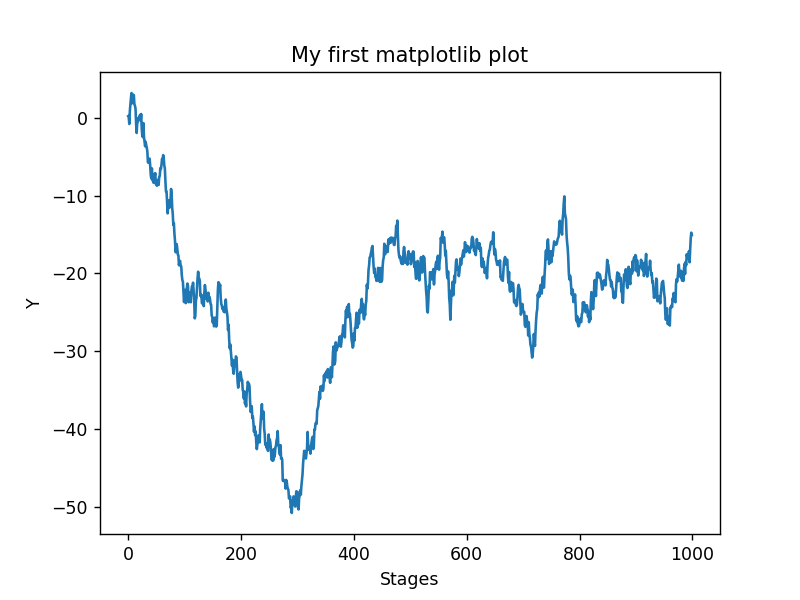

[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'Stages'),
 Text(0.5, 1.0, 'My first matplotlib plot')]

In [44]:
# 轴的类有集合方法
# 批量设定绘图选项
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages',
    'ylabel': 'Y'
}
ax.set(**props)

## 9.1.6 添加图例

In [45]:
# 图例(legend)是另一种用于标识图表元素的重要工具
# 最简单的是：在添加subplot的时候传入label参数

from numpy.random import randn
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


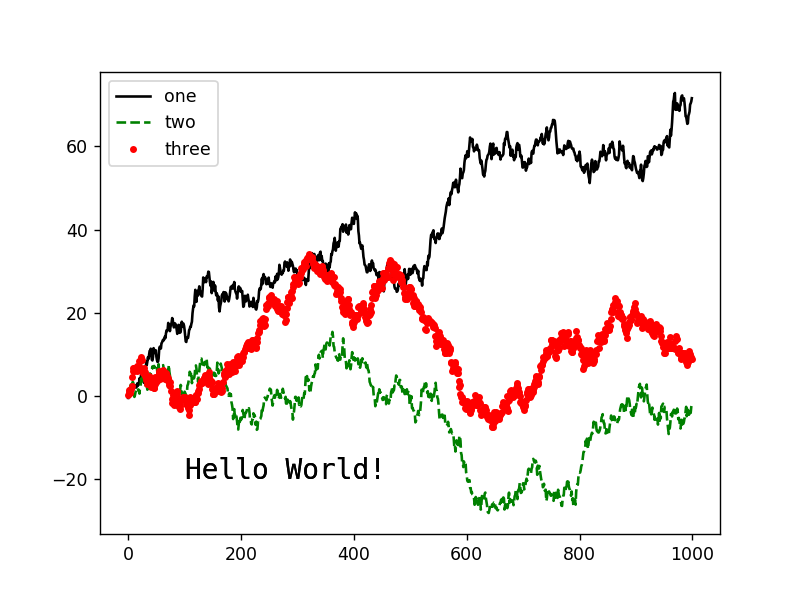

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

In [47]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [48]:
ax.plot(randn(1000).cumsum(), 'g--', label='two')

In [49]:
ax.plot(randn(1000).cumsum(), 'r.', label='three')

In [50]:
# 可以调用ax.legend() or plt.legend() 来自动创建图例

plt.legend(loc='best')

# loc告诉matplotlib要将图例放在哪。 'best'：会选择最不碍事的位置

In [51]:
ax.legend?

## 9.1.7 注解以及在subplot上绘图

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [55]:
# text可将文本绘制在图表的指定坐标(x, y), 还可以加上一些自定义的格式

ax.text(100, -20, 'Hello World!',
       family='monospace', fontsize=16)

Text(100, -20, 'Hello World!')

<IPython.core.display.Javascript object>


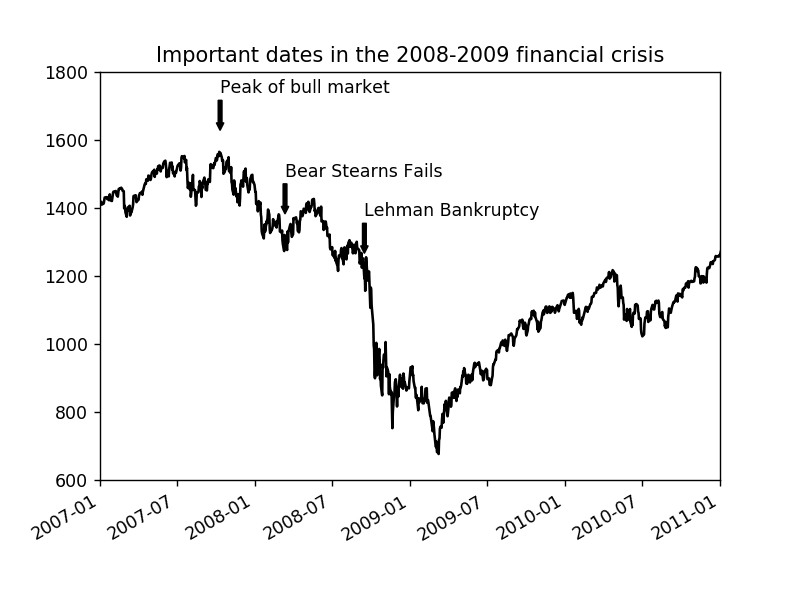

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [56]:
# 绘图

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1,1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date)+75),
               xytext=(date, spx.asof(date)+225),
               arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007 - 2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

In [57]:
plt.savefig('two.pdf', dpi=400, bbox_inches='tight')

<IPython.core.display.Javascript object>


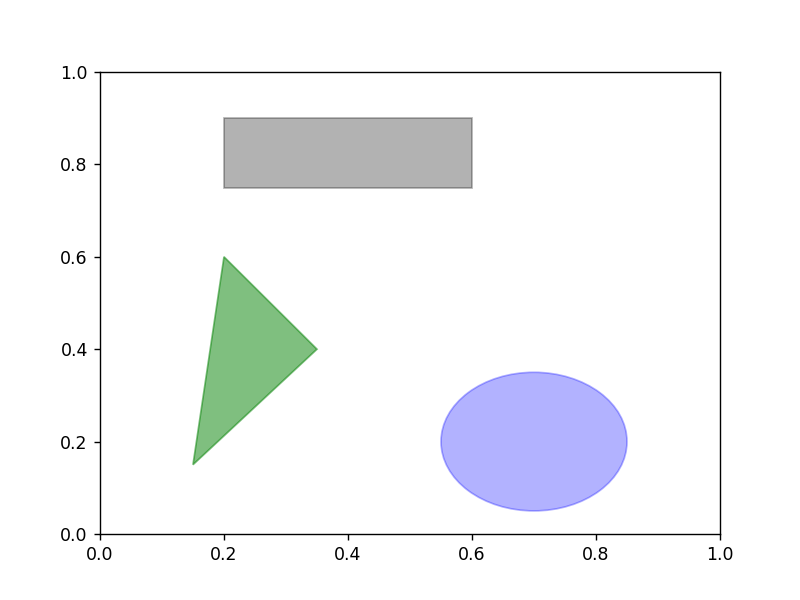

In [58]:
# 要在图表一个图形，需要创建一个块对象shp，然后通过ax.add_patch(shp)将其添加到subplot中

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                  color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.1.8 将图表保存到文件

In [59]:
%%html
<img src="picture/表9-2 Figure.savefig的选项.png">

## 9.19 matplotlib 配置

# 9.2 使用pandas和seaborn绘图

## 9.2.1 线型图

In [113]:
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>


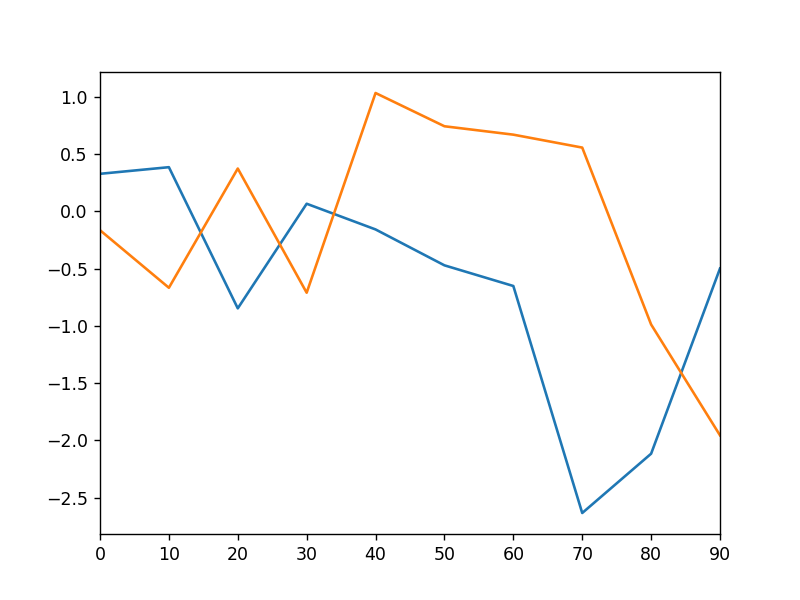

In [60]:
fig = plt.figure()
# ax = fig.add_subplot(1,1, 1)

In [63]:
# Series, DataFrame都有一个用于生成各类图表的plot方法。
# 默认生成：线型图

s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

# 该 Series 对象的索引会被传给 matplotlib, 并用以绘制 X 轴
# 可通过 use_index = False 禁用该功能

In [64]:
s.plot()

In [66]:
%%html
<img src="picture/表9-3 Series.plot方法的参数（1）.png">
<img src="picture/表9-3 Series.plot方法的参数.png">

In [67]:
# DataFrame的plot()会在一个subplot中为各列绘制一条线，并自动创建图例

df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

<IPython.core.display.Javascript object>


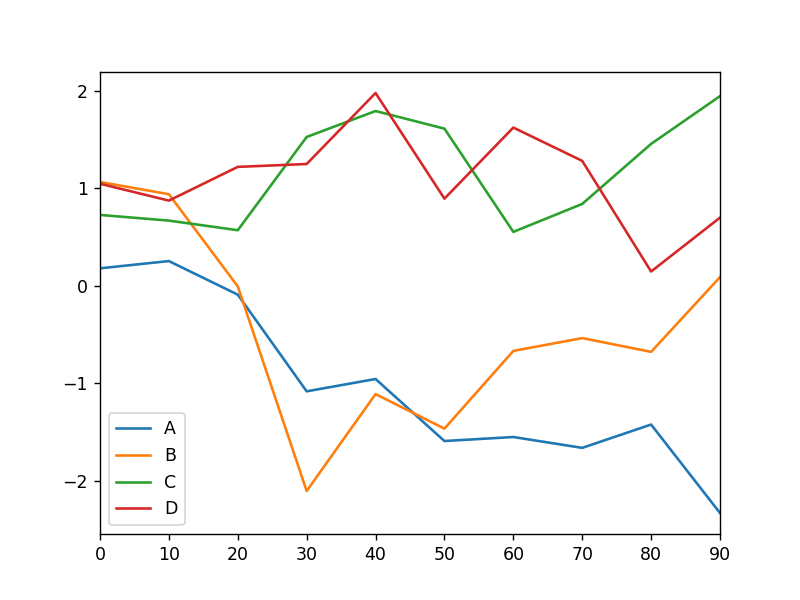

In [68]:
df.plot()

In [69]:
%%html
<img src="picture/表9-4 专用于DataFrame的plot参数.png">

## 9.2.2 柱状图

In [3]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


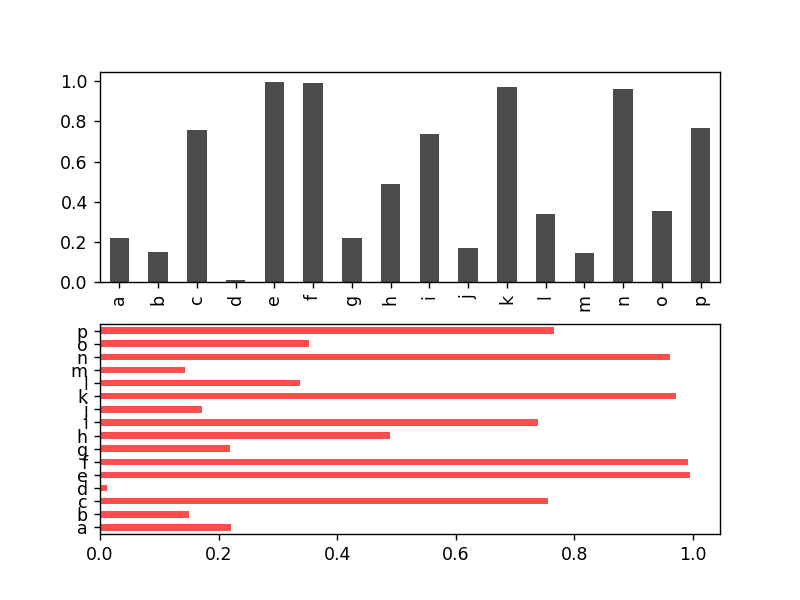

In [4]:
# plot.bar()：绘制【水平】柱状图
# plot.barh()：绘制【垂直】柱状图
# 此时，Series,DataFrame的索引将会被用作X(bar)或Y(barh)的刻度

fig, axes = plt.subplots(2, 1)

In [5]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [6]:
data.plot.bar(ax=axes[0], color='k', alpha=0.7)

In [7]:
data.plot.barh(ax=axes[1], color='r', alpha=0.7)

In [8]:
# 对于DataFrame，柱状图会将每一行的值分为一组，并排显示

df = pd.DataFrame(np.random.rand(6, 4),
                 index=['one', 'two', 'three', 'four', 'five', 'six'],
                 columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.199069,0.699116,0.472178,0.524152
two,0.683736,0.124415,0.319922,0.643919
three,0.109303,0.417358,0.277038,0.355016
four,0.494465,0.402149,0.250285,0.971871
five,0.222055,0.133898,0.294012,0.244703
six,0.620754,0.278101,0.058131,0.353917


<IPython.core.display.Javascript object>


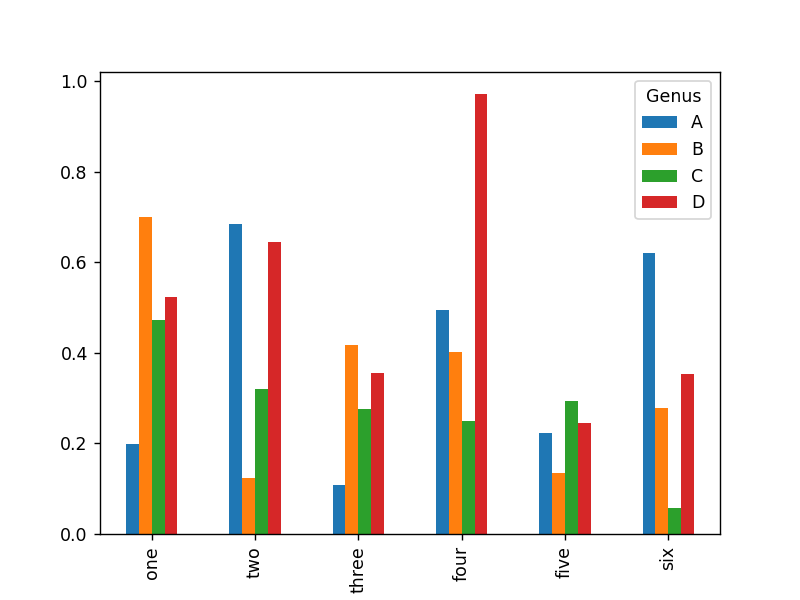

In [9]:
df.plot.bar()
# pl.legend(loc='best')

<IPython.core.display.Javascript object>


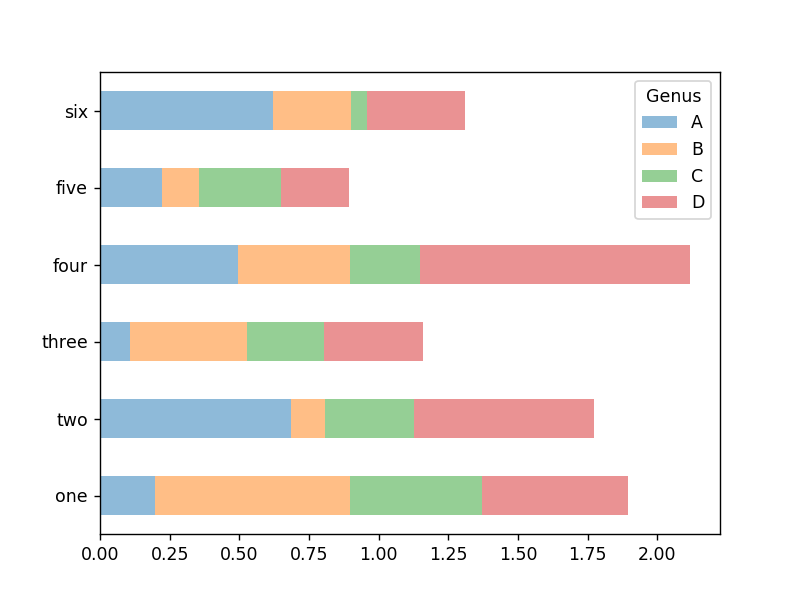

In [10]:
# stacked=True: 为DataFrame生成【堆积】柱状图

df.plot.barh(stacked=True, alpha=0.5)

In [11]:
# 做一张堆积柱状图，以展示每天各种聚会规模的数据点的百分比

tips = pd.read_csv('examples/tips.csv')

In [12]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [13]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [15]:
# Not many 1- and 6-person parties

party_counts = party_counts.loc[:, 2: 5]

In [16]:
# 进行规格化，使得各行的和为1，并生成图表

party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [17]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


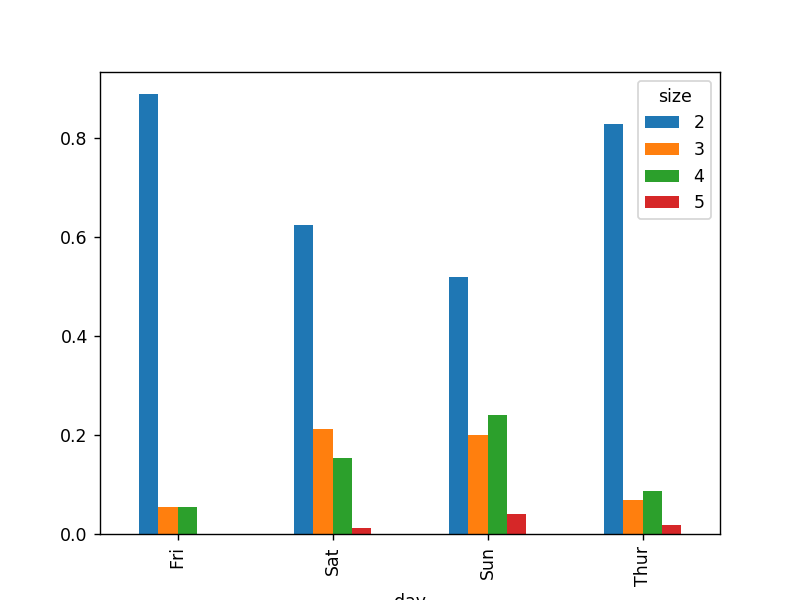

In [18]:
party_pcts.plot.bar()

In [19]:
# 对于在绘制一个图形之前，需要进行合计的数据，使用seaborn可以减少工作量

import seaborn as sns

In [20]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [21]:
ps.head()

NameError: name 'ps' is not defined

<IPython.core.display.Javascript object>


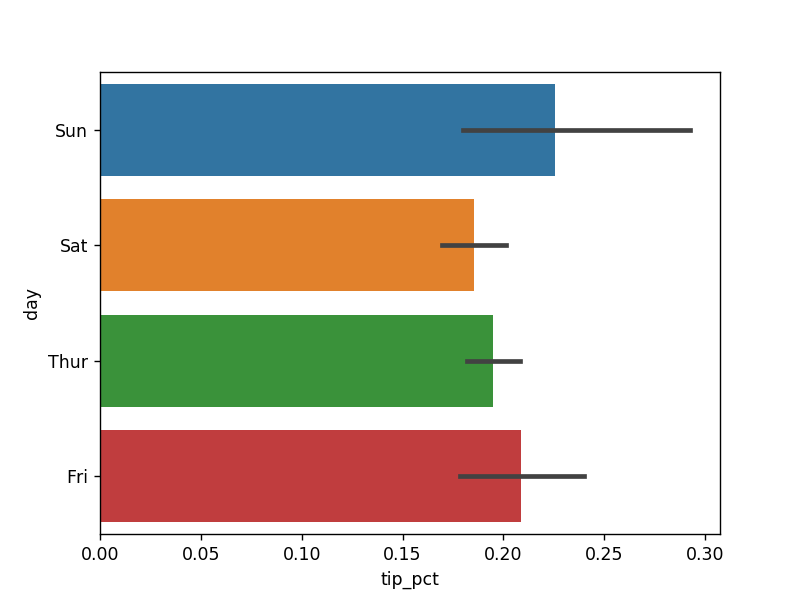

In [22]:
fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# # %matplotlib notebook


sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<IPython.core.display.Javascript object>


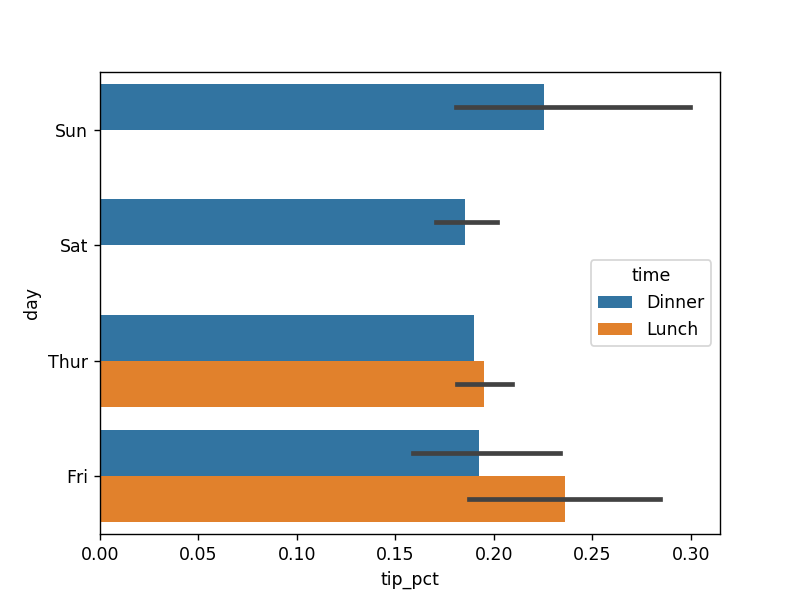

In [23]:
# 颜色选项
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

In [150]:
plt.hist?

## 9.2.3 直方图和密度图

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


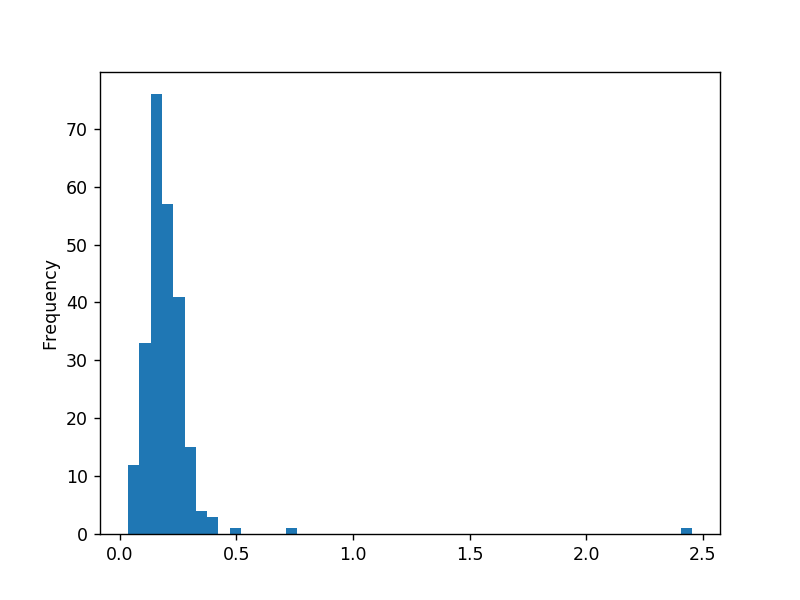

In [24]:
# 生成“小费占消费总额百分比”的直方图

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.hist(bins=50)

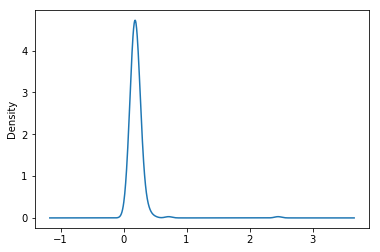

In [69]:
# 密度图

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


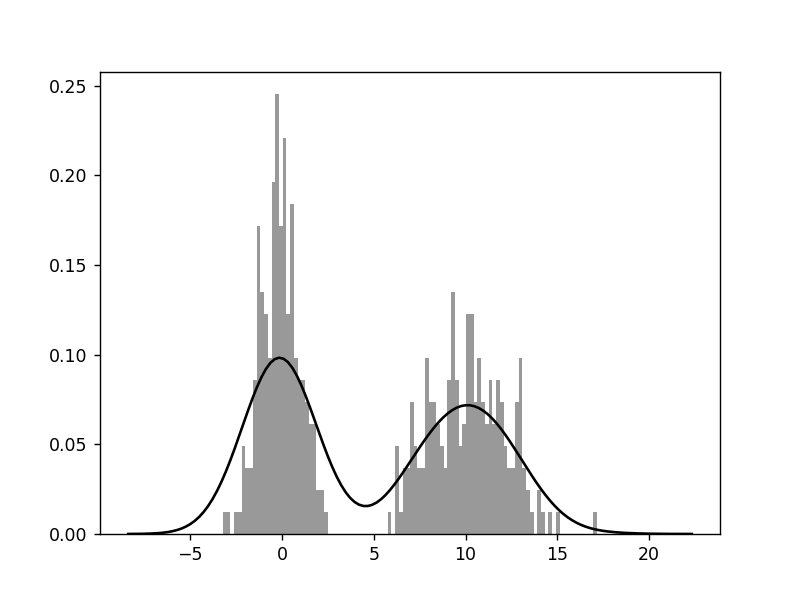

In [25]:
# distplot()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

## 9.2.4 散布图或点图

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [27]:
# 计算对数差

macro = pd.read_csv('examples/macrodata.csv')

In [28]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [29]:
trans_data = np.log(data).diff().dropna()

In [30]:
trans_data[-5: ]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


<IPython.core.display.Javascript object>


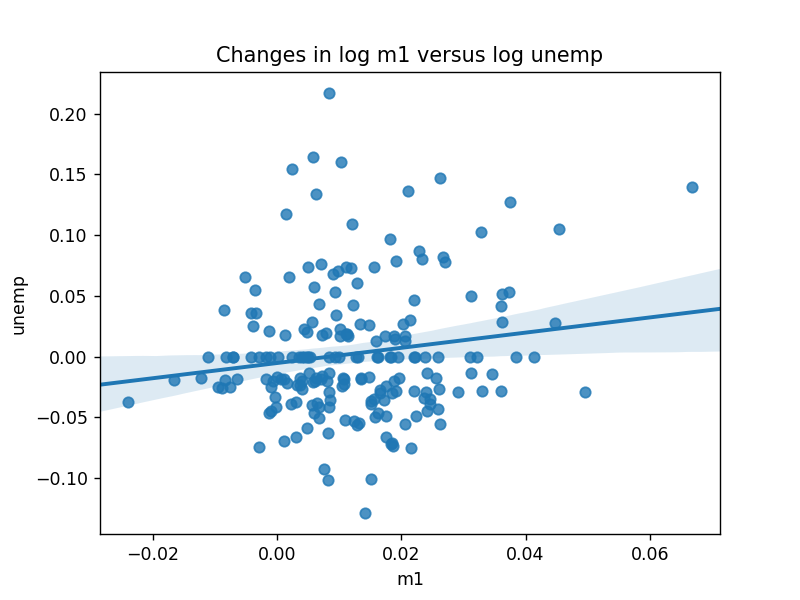

In [31]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

sns.regplot('m1', 'unemp', data=trans_data)

In [32]:
plt.title('Changes in log %s versus log %s' %('m1', 'unemp'))

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

<IPython.core.display.Javascript object>


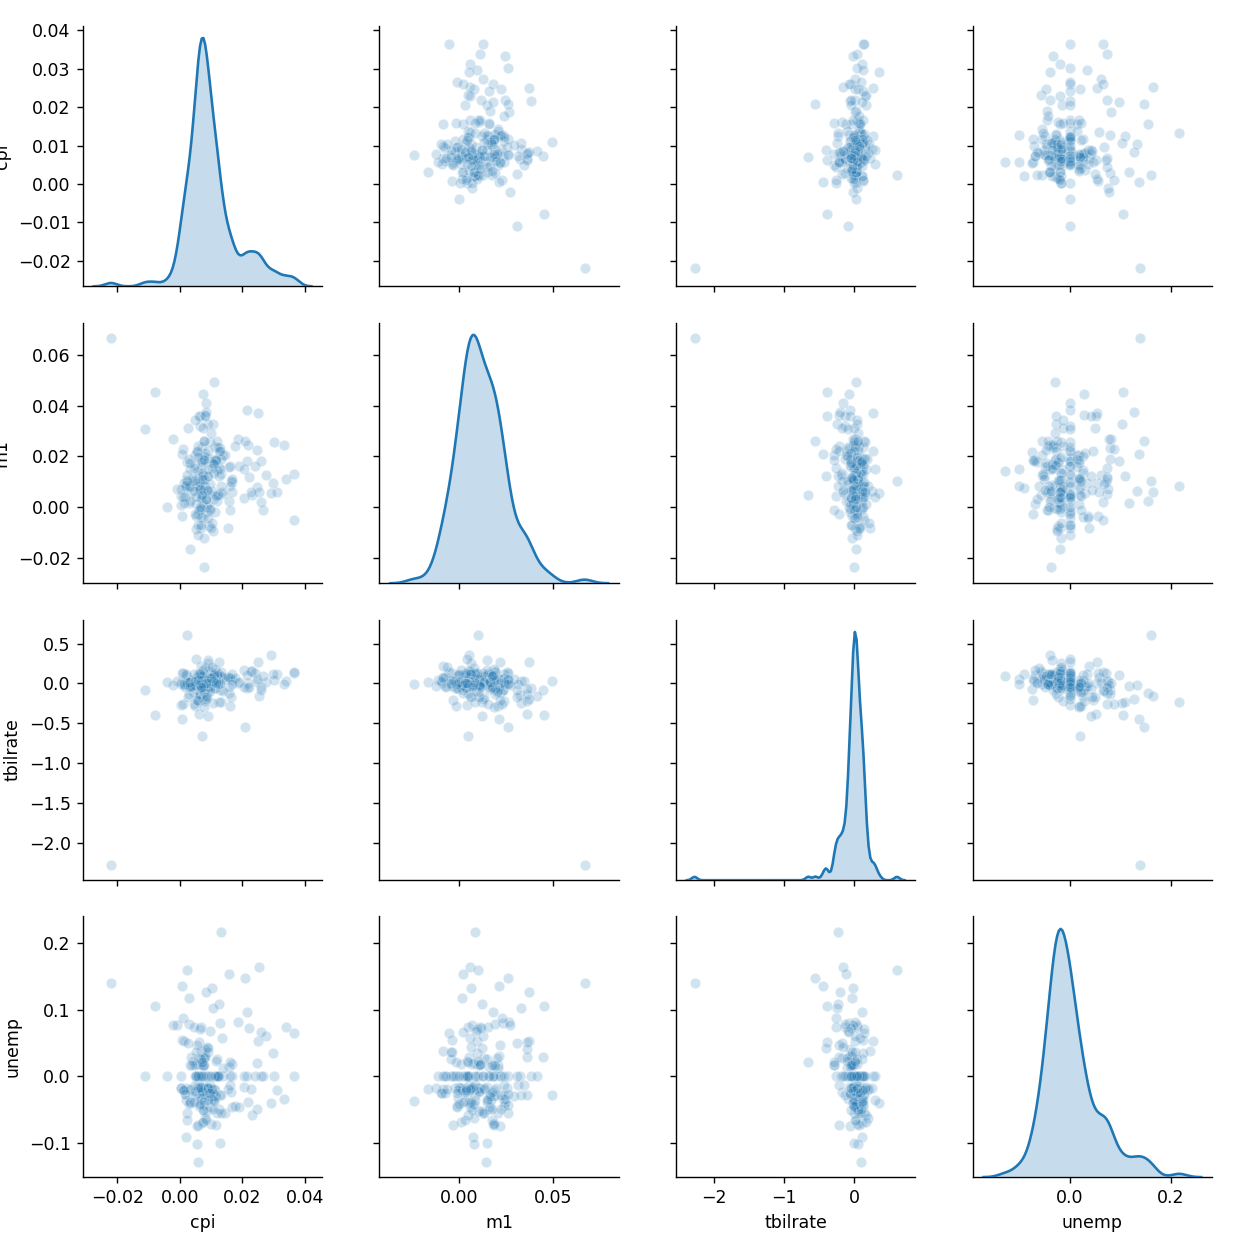

In [33]:
# seaborn.pairplot(): 支持在对角线上放置每个变量直方图或密度估计

sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

## 9.2.5 分面网格(facet grid)和类型数据

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>


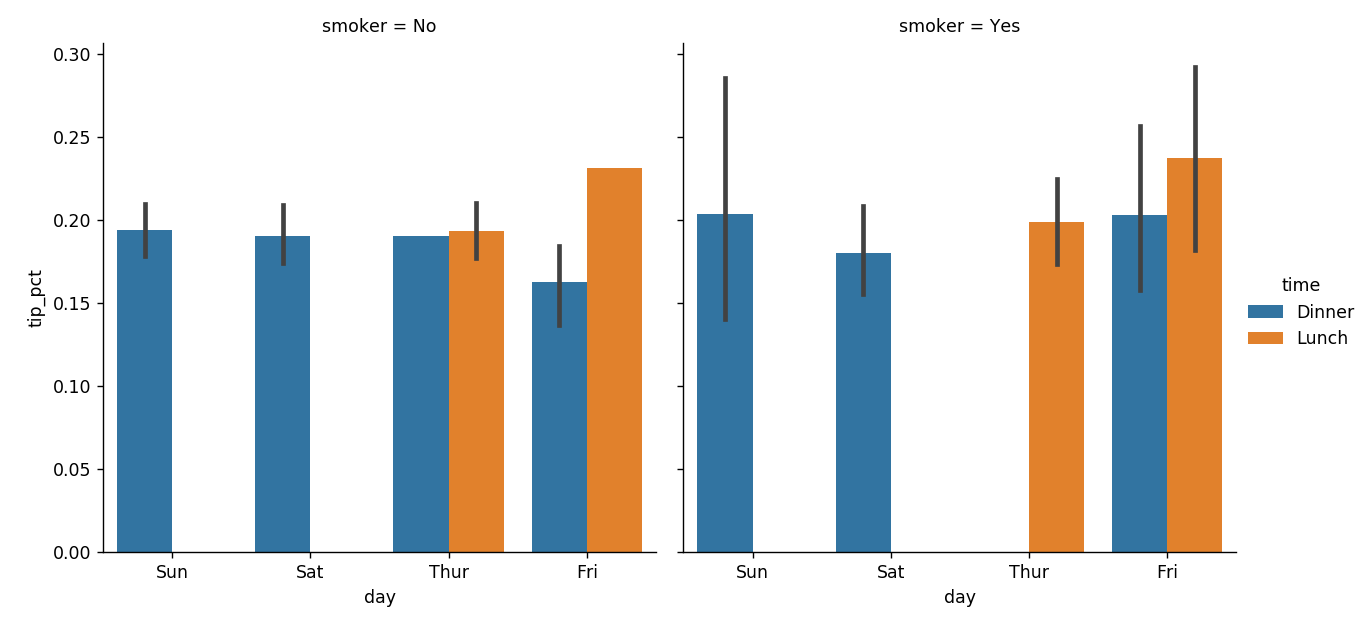

In [37]:
# sns.factorplot():简化制作多种分面图

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
              kind='bar', data=tips[tips.tip_pct<1])

<IPython.core.display.Javascript object>


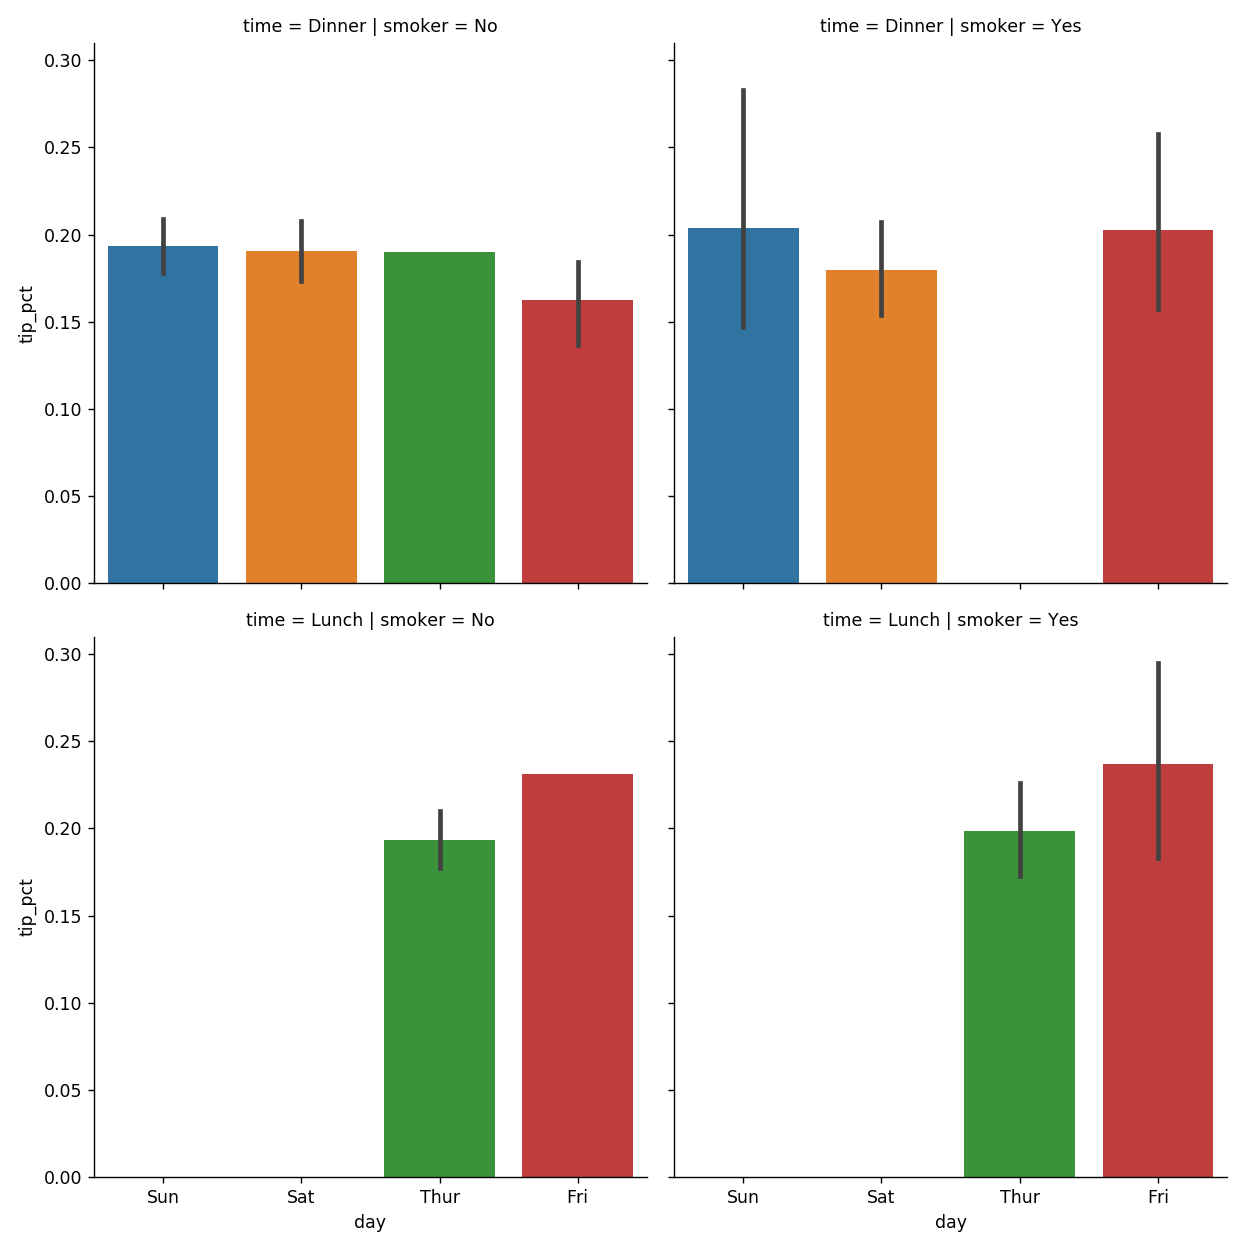

In [38]:
# 可以通过给每个时间值添加一行来扩展分面网格

sns.catplot(x='day', y='tip_pct', row='time',col='smoker',
               kind='bar', data=tips[tips.tip_pct<1])

<IPython.core.display.Javascript object>


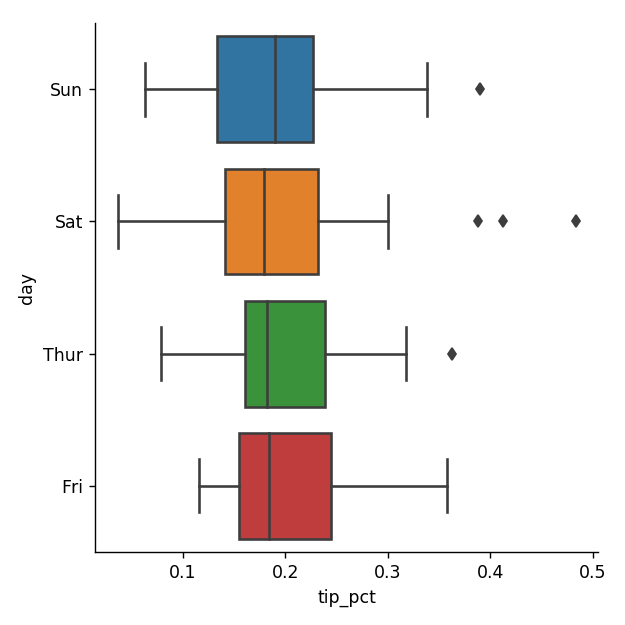

In [39]:
# sns.factorplot(): 支持其它绘图类型。
# 如，盒图：可以显示中位数、四分位数和异常值

sns.catplot(x='tip_pct', y='day', kind='box',
              data=tips[tips.tip_pct<0.5])